# <center>DATA.ML.200 Pattern Recognition and Machine Learning</center>

## <center>Exercise 3</center>

### <center>Md. Abdullah-Al Mamun</center>

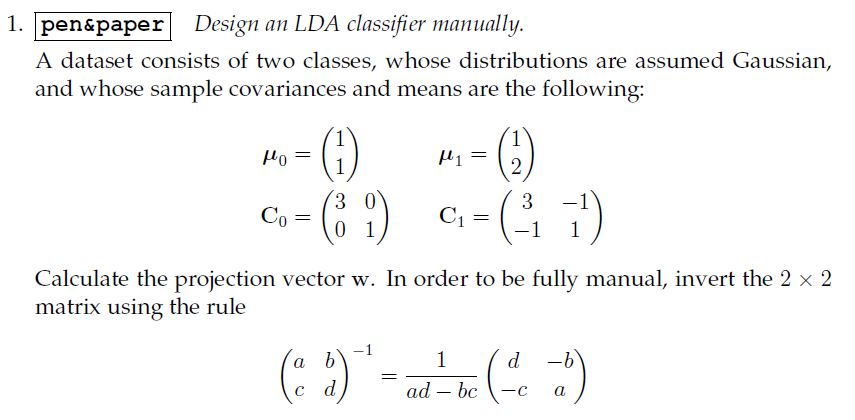

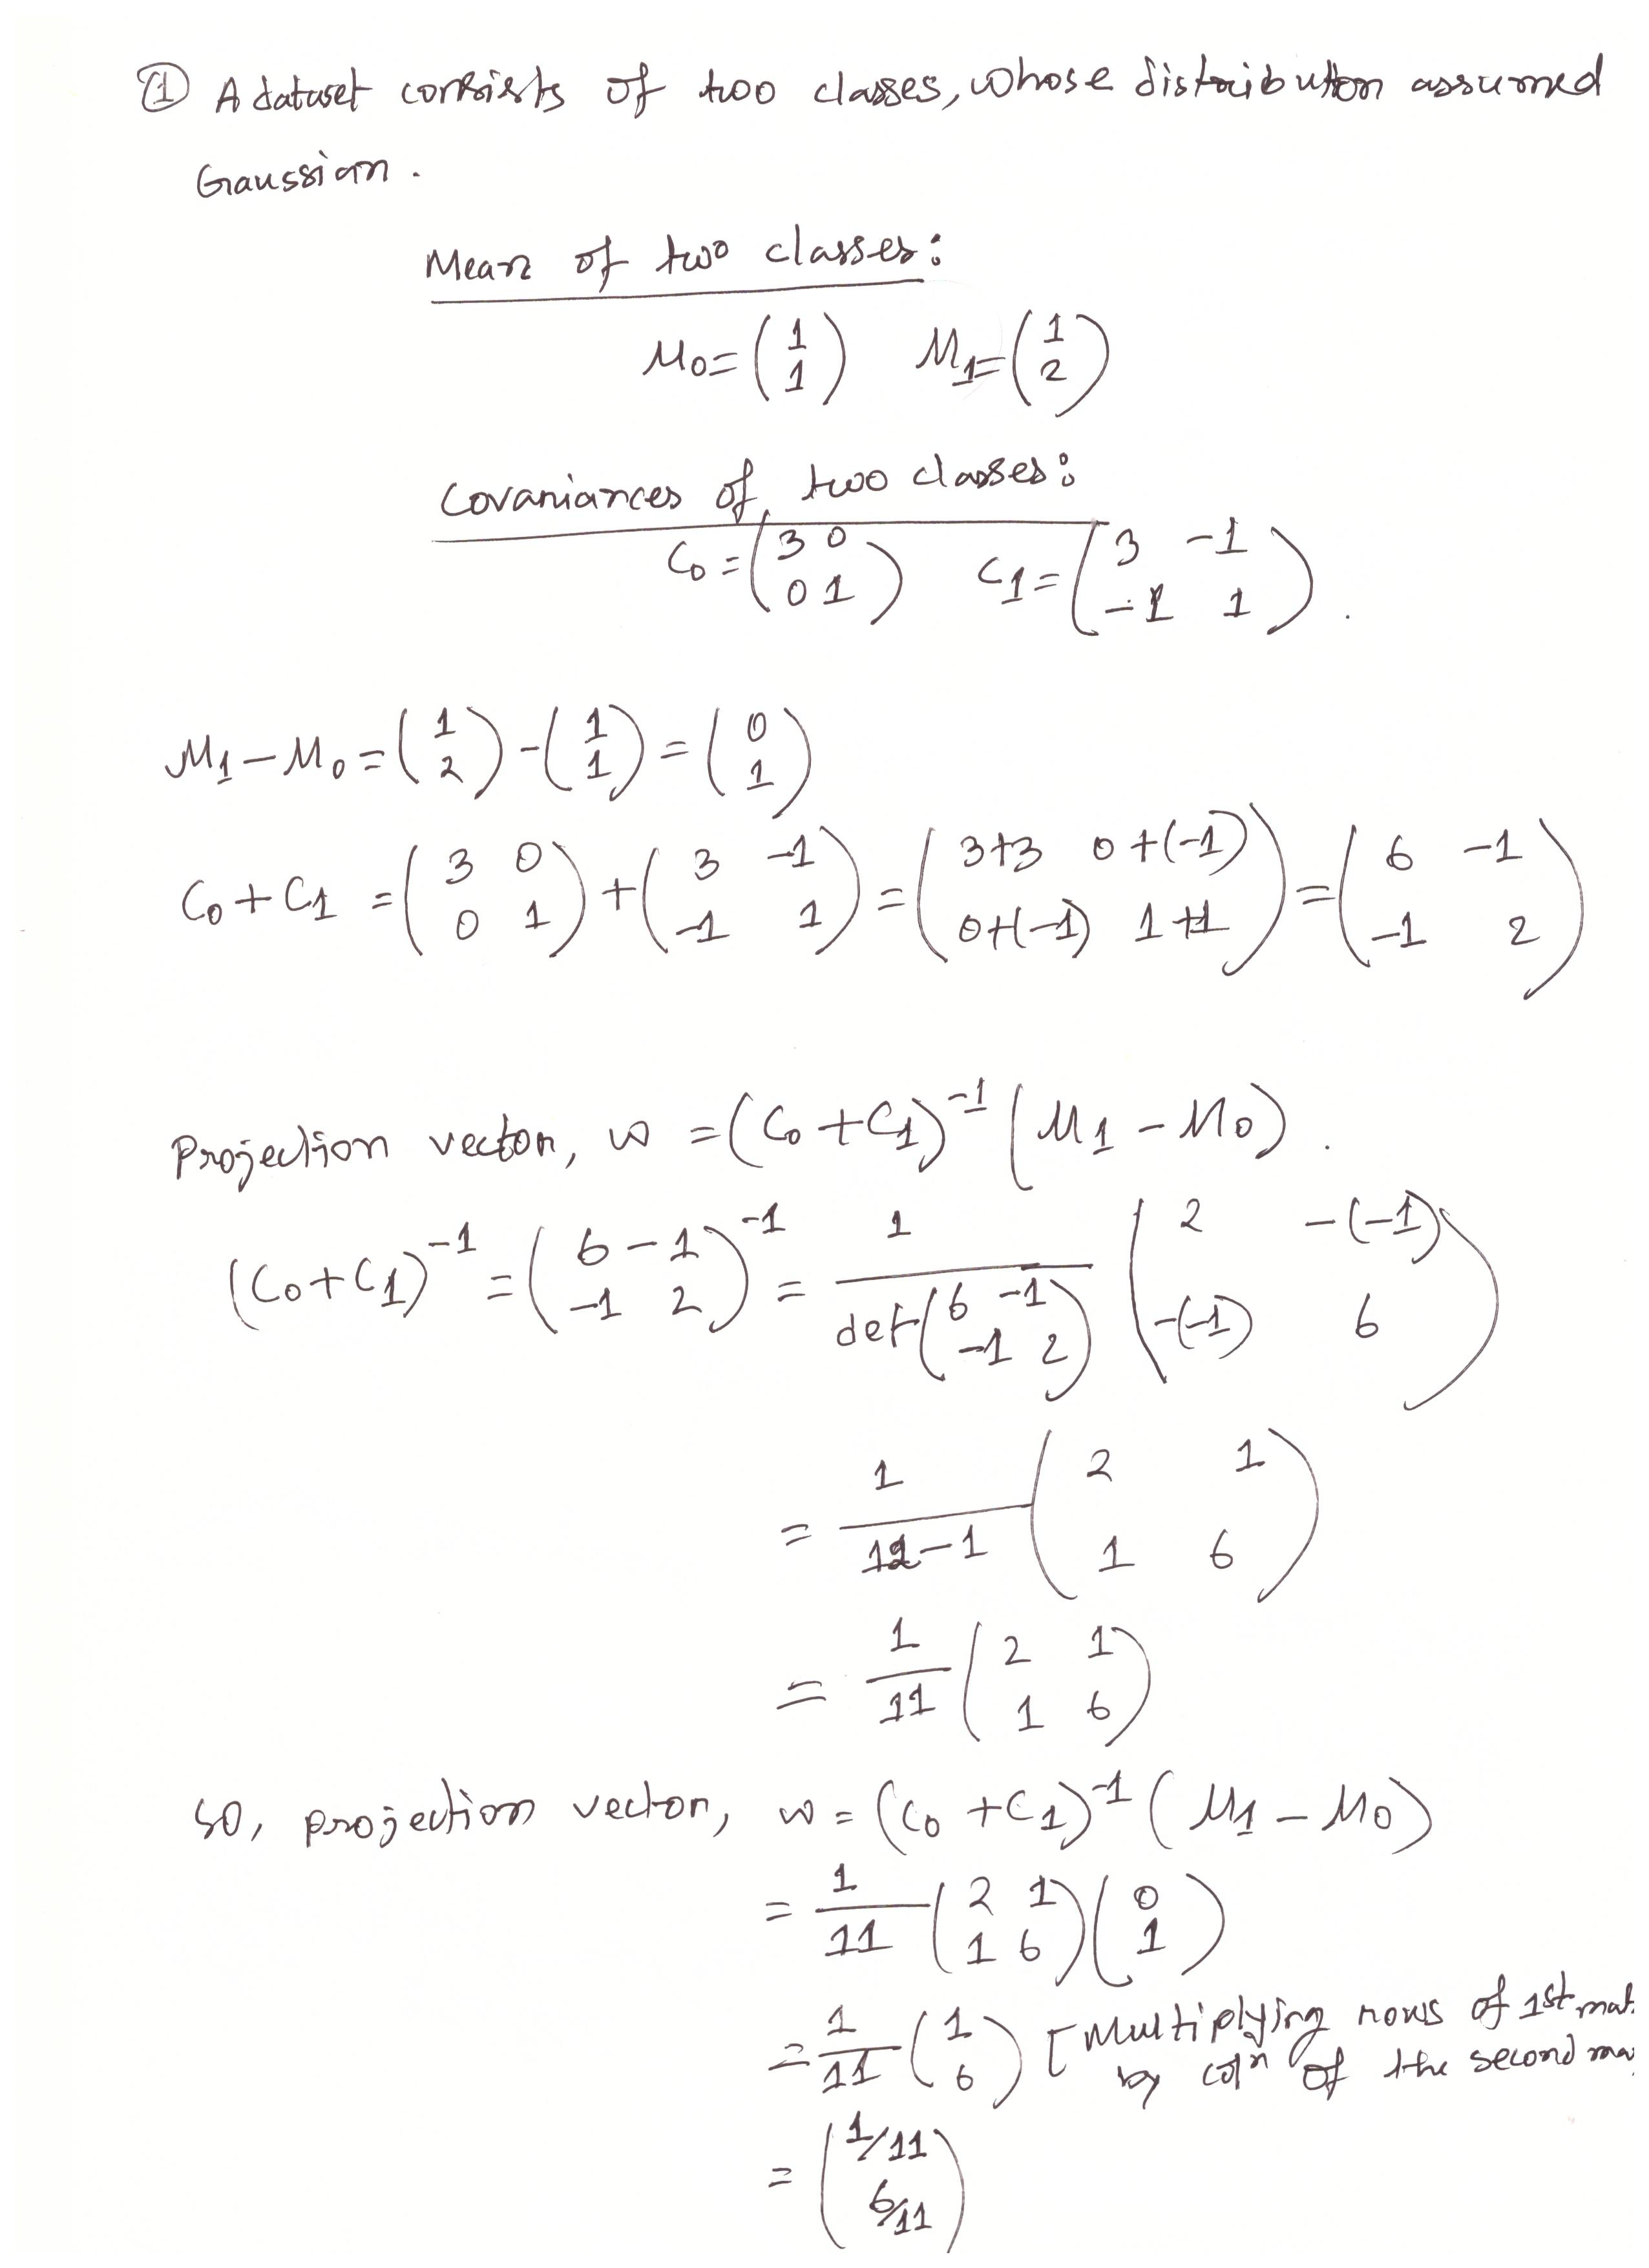

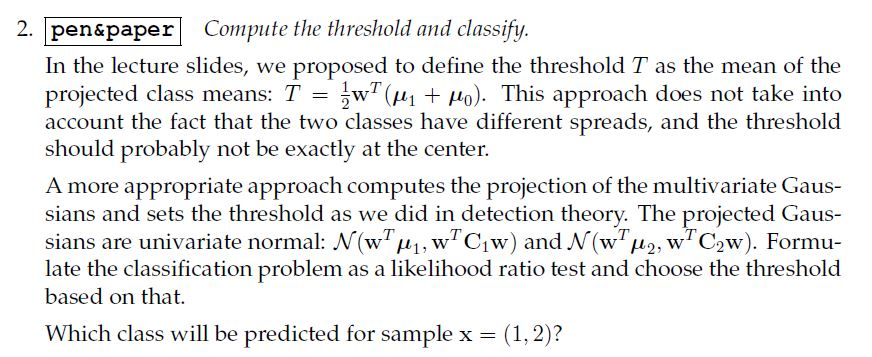


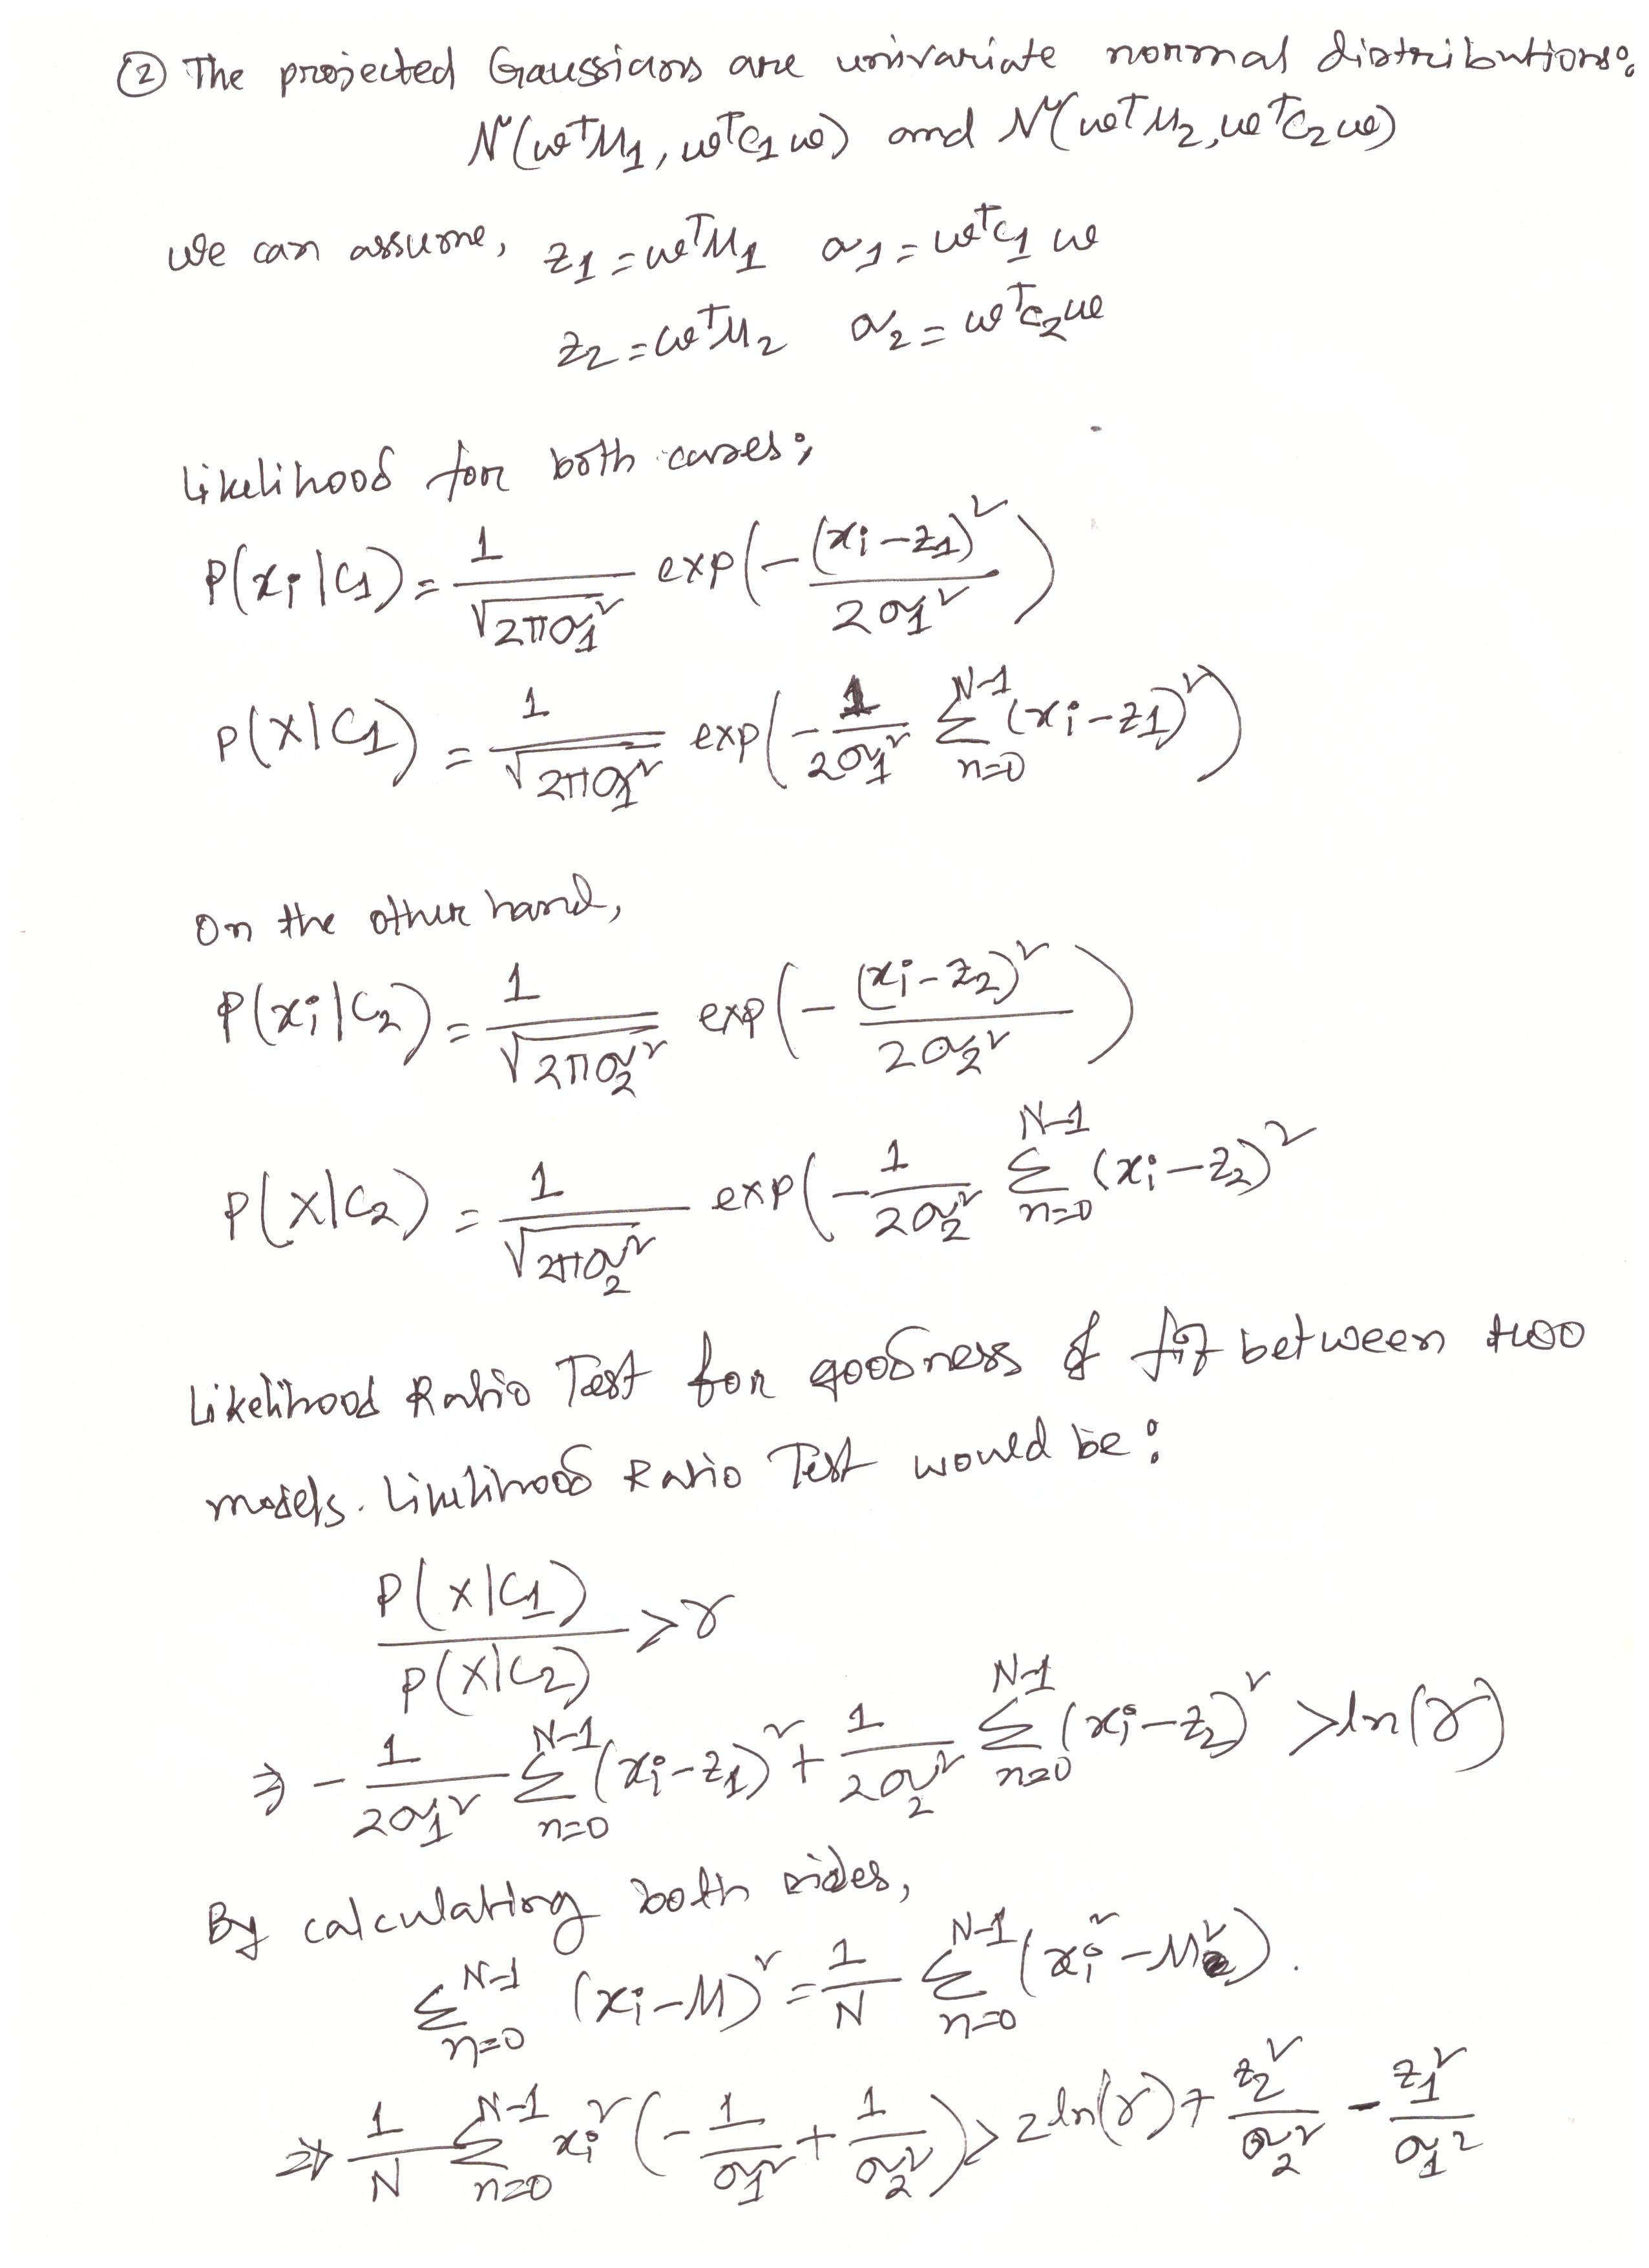
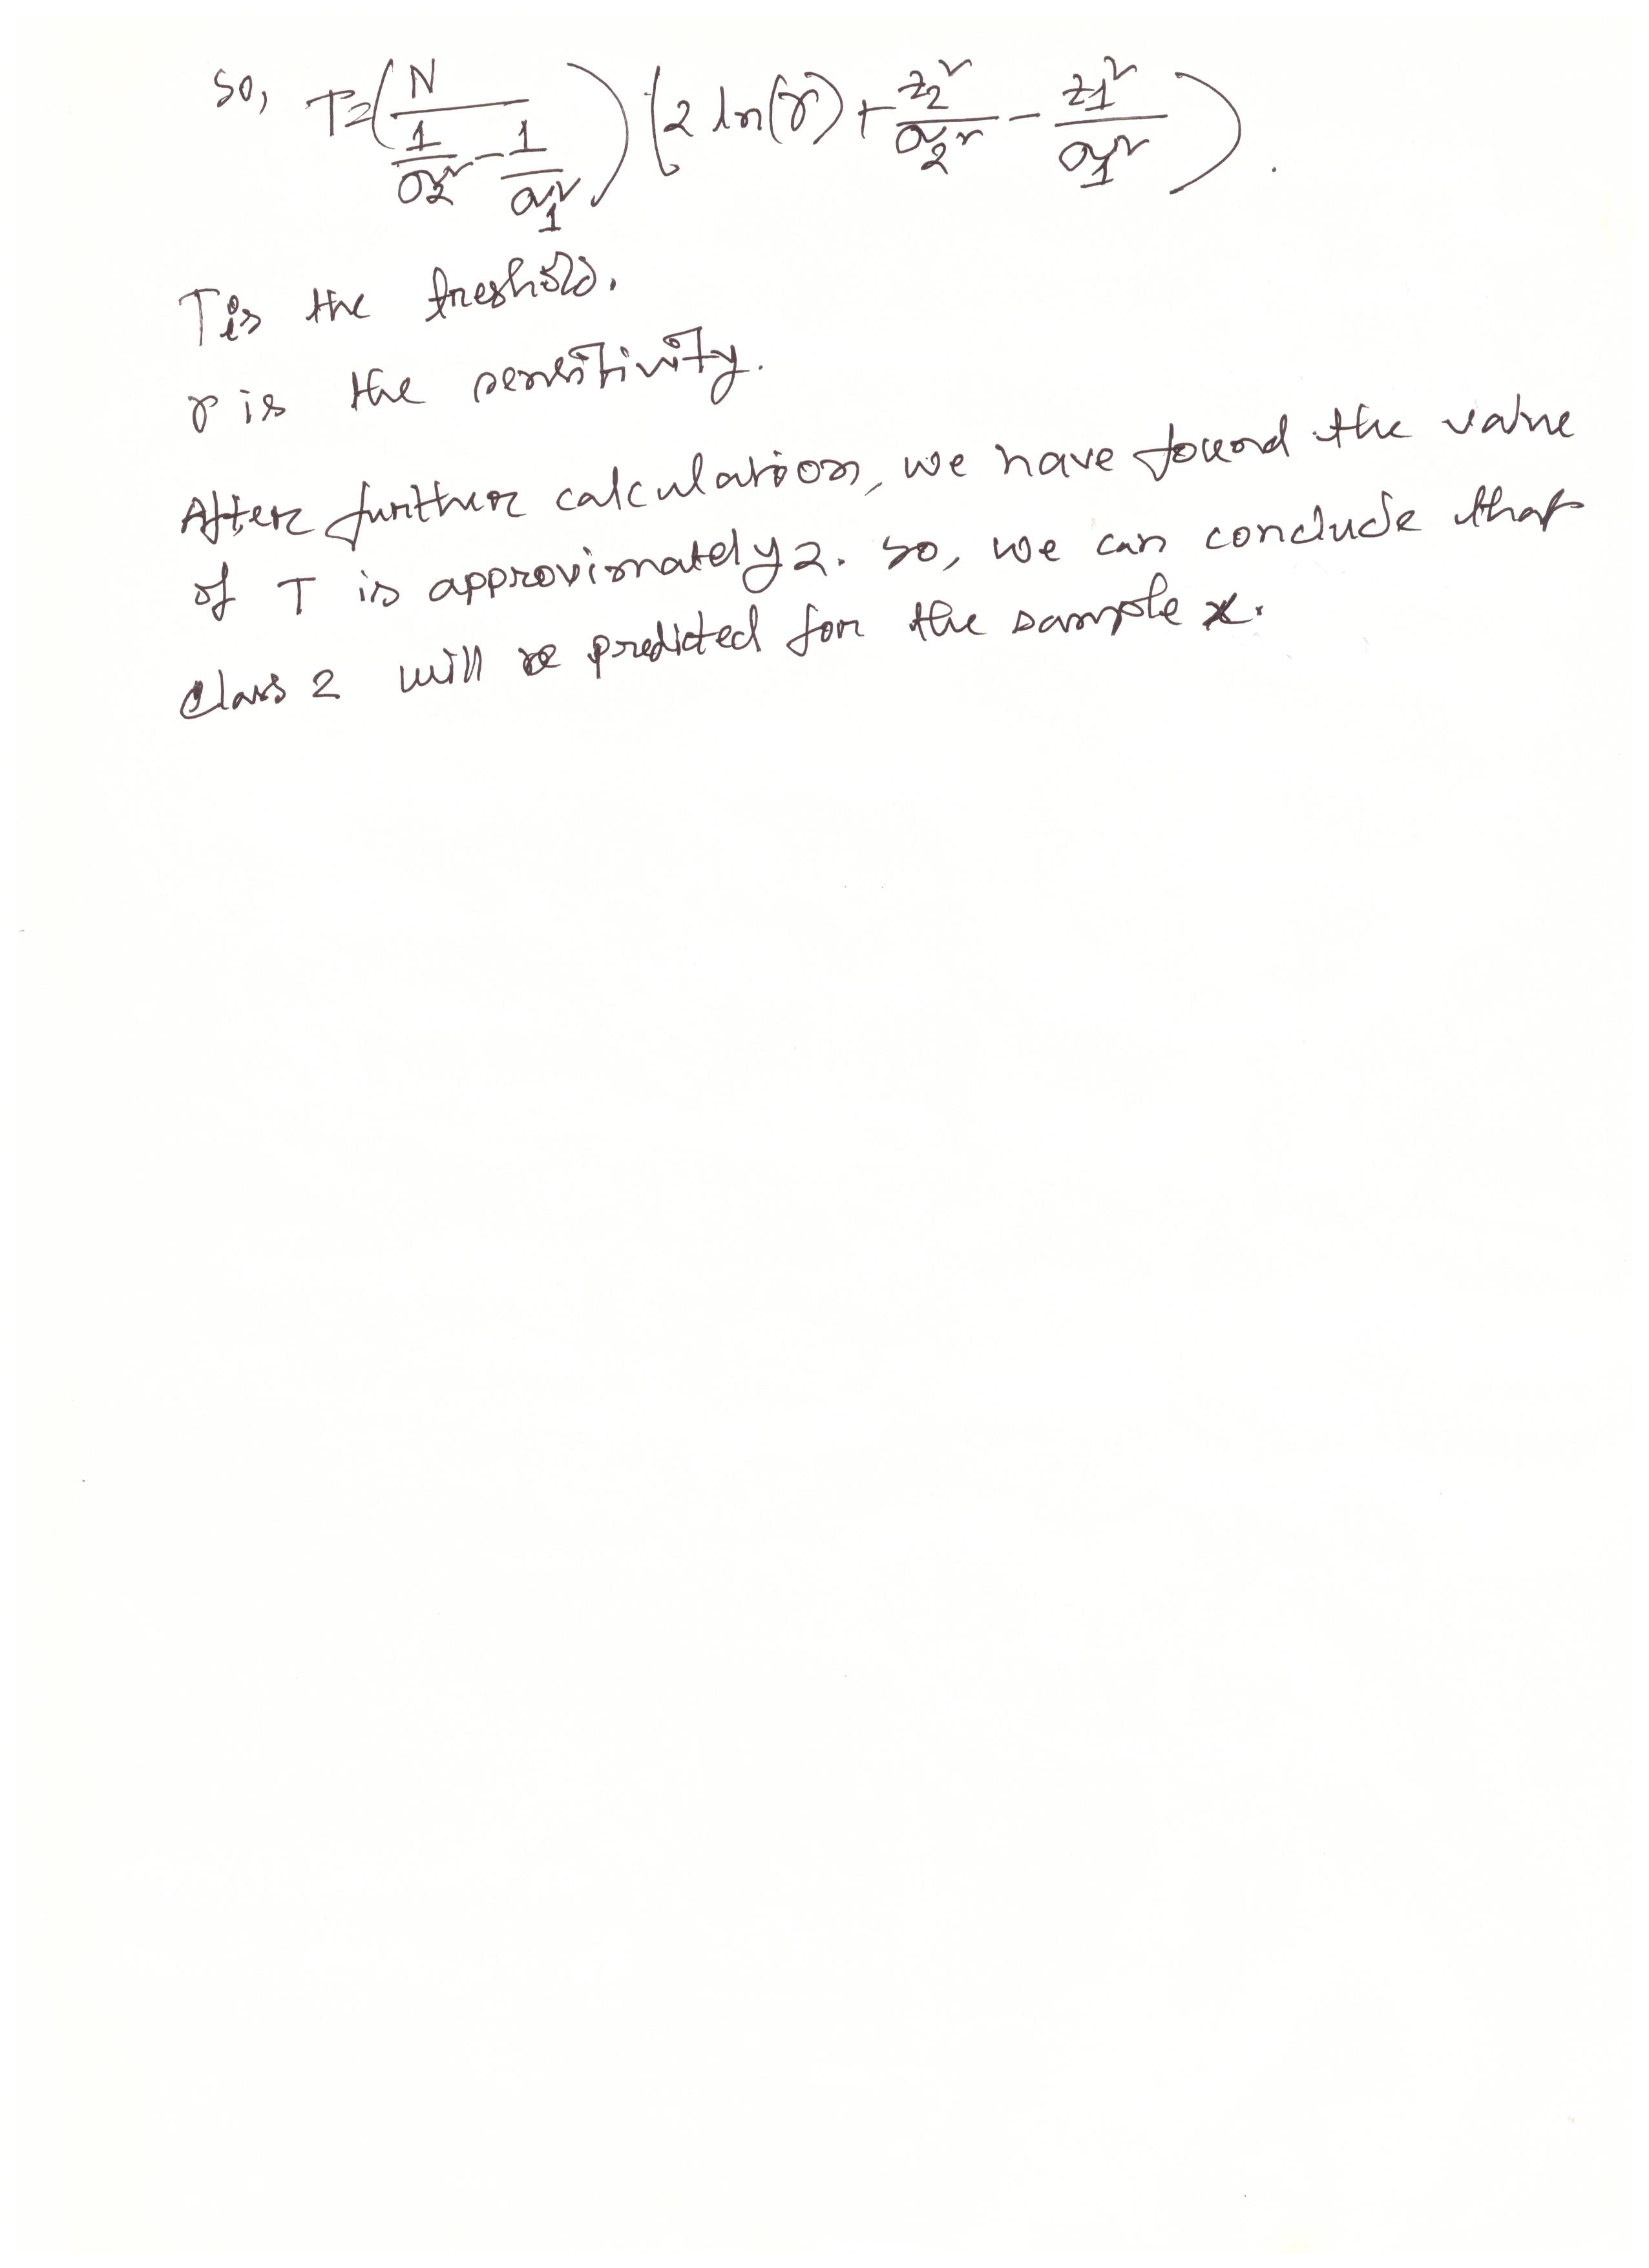

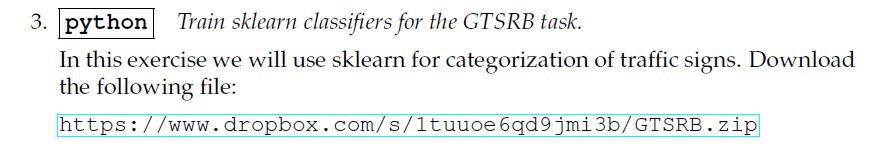
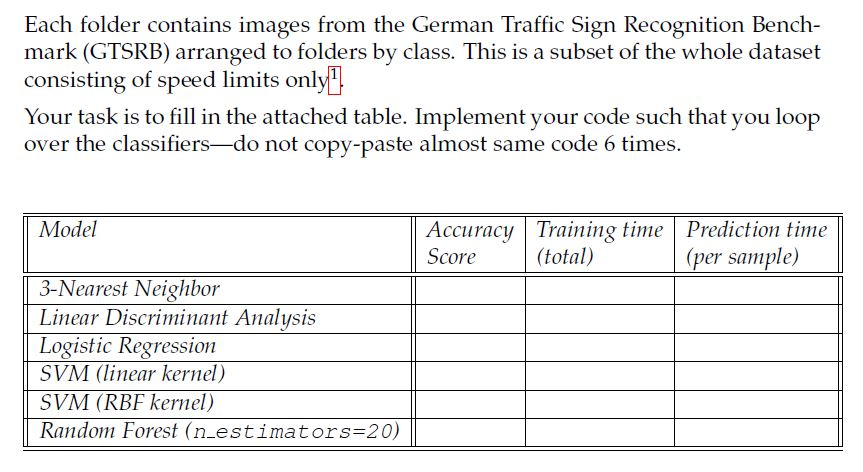
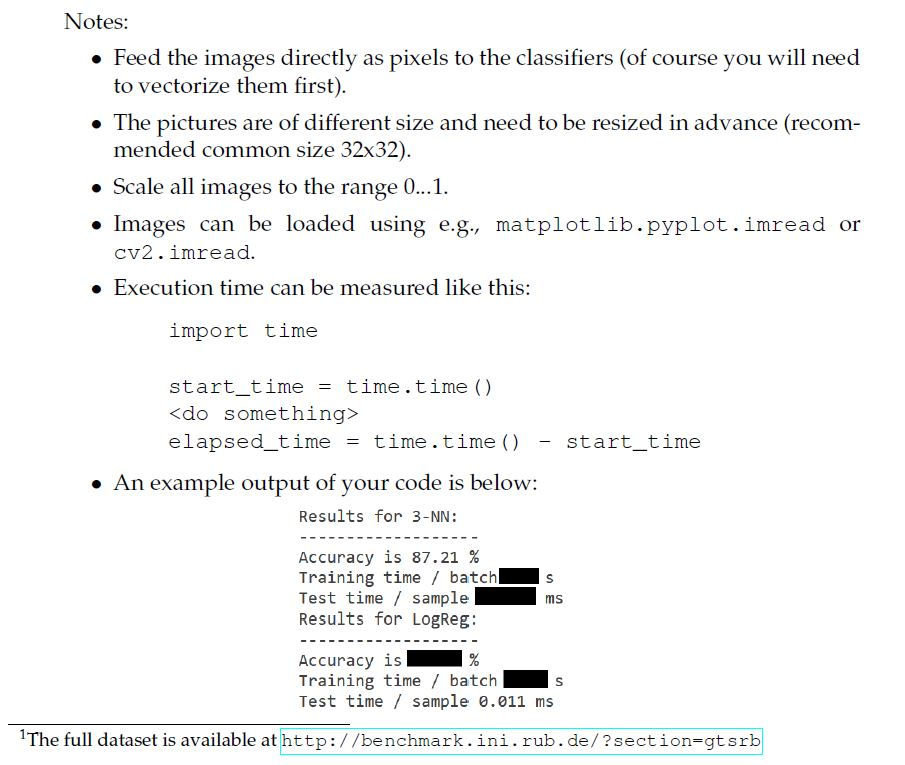

In [1]:
# unzipping

from shutil import unpack_archive
unpack_archive('GTSRB.zip', 'data/')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import*
from PIL import Image   
import pandas as pd


wrap="data"
directory=""
direct=(directory+wrap)
data=load_files(direct, load_content=False, description=None)
fname=data.filenames

In [3]:
def file_format_check(file):
    if file.split(".")[1]=="jpg":
        return True
    else:
        return False

    
fname=[file for file in fname if file_format_check(file)]

In [4]:
X=np.zeros((len(fname),32,32,3))
y=np.zeros((len(fname),1))

for i,file in enumerate(fname):    
    imge=Image.open(file).resize((32,32))    
    imger=np.asarray(imge)/255    
    X[i,:]=imger   
    y[i]=int(file.rsplit(wrap)[1].split("\\")[1])

In [5]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import*
from sklearn.neighbors import*
from sklearn.svm import*
from sklearn.discriminant_analysis import*
from sklearn.model_selection import*
from sklearn.metrics import*
from sklearn.ensemble import*
from sklearn.multiclass import*
import time


reshape_X=X.reshape(X.shape[0],-1)

train_X, testX, trainy, testy = train_test_split(reshape_X,y,random_state=0,test_size=0.2)
reshape_X=[] 

In [6]:
indx=["3- NN","LDA","LogReg","SVM(linear kernel)","SVM(RBF)","RF(estimators=20)"]
columns=["Acc Score","Training time","Predict time"]

df=pd.DataFrame(columns=columns, index=indx)
df.index.name="Model"

In [7]:
modl=[(indx[0],KNeighborsClassifier(n_neighbors=3)),(indx[1],LinearDiscriminantAnalysis()),
       (indx[2],LogisticRegression()),(indx[3],OneVsRestClassifier(SVC(kernel='linear'))),
       (indx[4],OneVsRestClassifier(SVC(kernel='rbf'))),(indx[5],RandomForestClassifier(n_estimators=20))]

In [8]:
for name, model in modl:
    start_time1=time.time()
    model.fit(train_X,trainy)
    elapsed_time1=time.time()-start_time1
    
    start_time2=time.time()
    prediction_y=model.predict(testX)
    
    elapsed_time2=time.time()-start_time2
    elapsed_time2_per_sample=elapsed_time2/testX.shape[0]
    accuracyscore=accuracy_score(testy,prediction_y)
    
   
    print("Results for {}:".format(name))
    print(40*"-")
    
    
    print("Accuracy is {:.2f} %".format(accuracyscore*100))
    print("Training time / batch: {:.3f} s".format(elapsed_time1))
    print("Test time / sample: {:.3f} ms".format(elapsed_time2_per_sample*1000))
    print("\n")  
    
    
    df.loc[name,"Acc Score"]=accuracyscore
    df.loc[name,"Training time"]=elapsed_time1
    df.loc[name,"Predict time"]=elapsed_time2_per_sample*1000



Results for 3- NN:
----------------------------------------
Accuracy is 89.84 %
Training time / batch: 1.522 s
Test time / sample: 25.539 ms


Results for LDA:
----------------------------------------
Accuracy is 71.66 %
Training time / batch: 21.476 s
Test time / sample: 0.007 ms


Results for LogReg:
----------------------------------------
Accuracy is 91.81 %
Training time / batch: 63.710 s
Test time / sample: 0.008 ms


Results for SVM(linear kernel):
----------------------------------------
Accuracy is 89.67 %
Training time / batch: 243.725 s
Test time / sample: 21.139 ms


Results for SVM(RBF):
----------------------------------------
Accuracy is 81.26 %
Training time / batch: 400.415 s
Test time / sample: 49.267 ms


Results for RF(estimators=20):
----------------------------------------
Accuracy is 91.19 %
Training time / batch: 3.459 s
Test time / sample: 0.018 ms




In [9]:
from IPython.display import display, HTML

display(df)

,Acc Score,Training time,Predict time
Model,,,
3- NN,0.898429,1.52201,25.5394
LDA,0.716611,21.4756,0.00671693
LogReg,0.91807,63.7101,0.00782005
SVM(linear kernel),0.896745,243.725,21.1393
SVM(RBF),0.81257,400.415,49.2668
RF(estimators=20),0.911897,3.45933,0.0184691


# Attached table

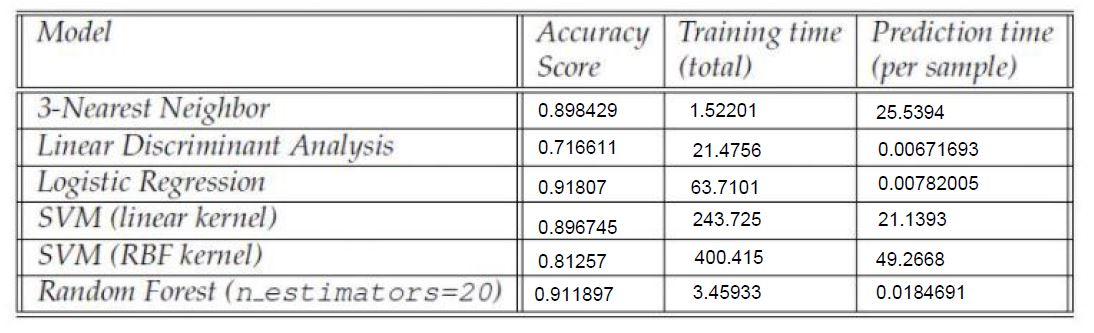

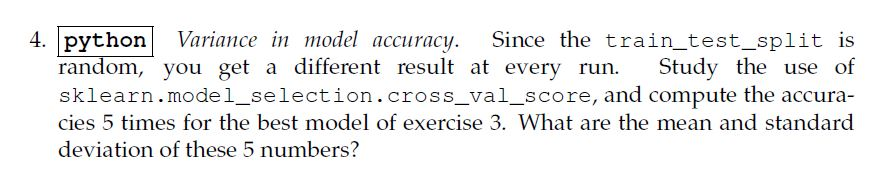

In [ ]:
from sklearn.model_selection import cross_val_score

rf_model=RandomForestClassifier(n_estimators=20)
cvscore=cross_val_score(rf_model,X,y, cv=5)

print(" Cross validation score: {:.2f}\n Mean: {:.2f}\n Standard Deviation: {:.3f}".format(cvscore,np.mean(cvscore),
                                                                                           np.std(cvscore)))

Cross validation score: [0.89 0.91 0.91 0.89 0.93]

Mean: 0.90


Standard Deviation: 0.015

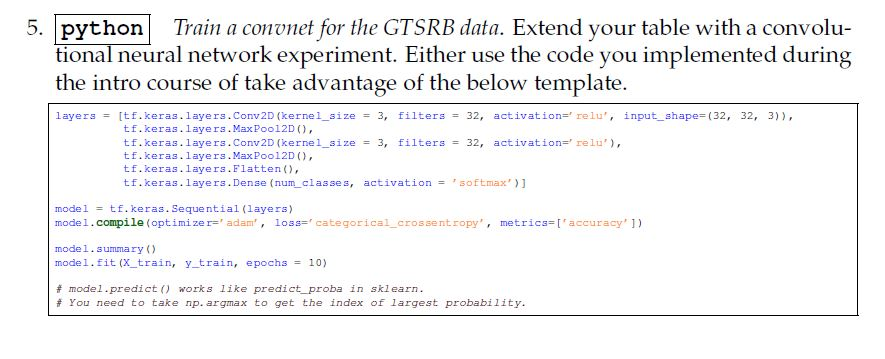

In [14]:
import tensorflow as tf
from sklearn.model_selection import*
from tensorflow.keras.utils import*

class_n=np.unique(y).shape[0]
category_y=to_categorical(y,class_n)
train_X, testX, trainy, testy = train_test_split(X,category_y,test_size=0.2, random_state=0)
layers = [tf.keras.layers.Conv2D(kernel_size = 3, filters = 32, activation='relu', input_shape=(32, 32, 3)),
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Conv2D(kernel_size = 3, filters = 32, activation='relu'),
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(class_n, activation = 'softmax')]

In [15]:
model = tf.keras.Sequential(layers)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 10377     
Total params: 20,521
Trainable params: 20,521
Non-trainable params: 0
__________________________________________________

In [16]:
start_time1=time.time()
history=model.fit(train_X, trainy, epochs = 10)
elapsed_time1=time.time()-start_time1


start_time2=time.time()
model_ev=model.evaluate(testX,testy,verbose=0)
elapsed_time2=time.time()-start_time2


Epoch 1/10
223/223 [==============================] - 3s 13ms/step - loss: 1.8116 - accuracy: 0.3061
Epoch 2/10
223/223 [==============================] - 3s 14ms/step - loss: 0.9526 - accuracy: 0.7040
Epoch 3/10
223/223 [==============================] - 3s 14ms/step - loss: 0.4538 - accuracy: 0.8770
Epoch 4/10
223/223 [==============================] - 3s 14ms/step - loss: 0.2815 - accuracy: 0.9280
Epoch 5/10
223/223 [==============================] - 3s 13ms/step - loss: 0.2040 - accuracy: 0.9467
Epoch 6/10
223/223 [==============================] - 3s 13ms/step - loss: 0.1579 - accuracy: 0.9593
Epoch 7/10
223/223 [==============================] - 3s 13ms/step - loss: 0.1227 - accuracy: 0.9707
Epoch 8/10
223/223 [==============================] - 3s 14ms/step - loss: 0.1035 - accuracy: 0.9736
Epoch 9/10
223/223 [==============================] - 3s 13ms/step - loss: 0.0840 - accuracy: 0.9813
Epoch 10/10
223/223 [==============================] - 3s 13ms/step - loss: 0.0667 - accura

In [18]:
print(" Model accuracy: {:.2f} %\n Training time total: {:.3f} s\n Test time / sample: {:.3f} ms".format((model_ev[1])*100,elapsed_time1,(elapsed_time2/testX.shape[0])*1000))


 Model accuracy: 96.02 %
 Training time total: 30.248 s
 Test time / sample: 0.146 ms
